# Rating Prediction Project

Submitted By    : Sindhu Shree N
    
Internship Batch: 19

In [26]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [27]:
#reading csv file
df=pd.read_csv("Scraped_data.csv")
df

,Unnamed: 0,review_content,rating
0,0,Awful service from Amazon,4.1 out of 5
1,1,Awesome laptop at this price,4.1 out of 5
2,2,Great Laptop! Extremely happy,4.1 out of 5
3,3,Overall laptop is good for students and workin...,4.1 out of 5
4,4,Up to the price.. Great Product.,3.8 out of 5
...,...,...,...
22617,22617,It's awesome ...and I have no words about th...,5.0 out of 5 stars
22618,22618,Good,4.0 out of 5 stars
22619,22619,Good,4.0 out of 5 stars
22620,22620,Good one,5.0 out of 5 stars


In [28]:
#displaying shape of the above dataframe
df.shape

(22622, 3)

So there are 22622 rows and 3 columns

In [29]:
df.dtypes

Unnamed: 0         int64
review_content    object
rating            object
dtype: object

Where both the review and the ratings are of object datatype.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22622 entries, 0 to 22621
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      22622 non-null  int64 
 1   review_content  22622 non-null  object
 2   rating          22622 non-null  object
dtypes: int64(1), object(2)
memory usage: 530.3+ KB


In [31]:
df.isnull().sum()

Unnamed: 0        0
review_content    0
rating            0
dtype: int64

In [32]:
df.isnull().any()

Unnamed: 0        False
review_content    False
rating            False
dtype: bool

In [33]:
#statistical summary
df.describe(include='all')

,Unnamed: 0,review_content,rating
count,22622.000000,22622,22622
unique,NaN,3622,14
top,NaN,Good,5.0 out of 5 stars
freq,NaN,1460,15245
mean,11310.500000,NaN,NaN
std,6530.553231,NaN,NaN
min,0.000000,NaN,NaN
25%,5655.250000,NaN,NaN
50%,11310.500000,NaN,NaN
75%,16965.750000,NaN,NaN


Now we need to extract only rate integer in rating feature. 

In [34]:
extracted_rate=df.rating.str.extract('(\d+)')
extracted_rate

,0
0,4
1,4
2,4
3,4
4,3
...,...
22617,5
22618,4
22619,4
22620,5


In [35]:
Df=pd.concat([df,extracted_rate],ignore_index=True,axis=1)
Df.columns=['Unnamed: 0','review_content','rating','new_rating']
Df

,Unnamed: 0,review_content,rating,new_rating
0,0,Awful service from Amazon,4.1 out of 5,4
1,1,Awesome laptop at this price,4.1 out of 5,4
2,2,Great Laptop! Extremely happy,4.1 out of 5,4
3,3,Overall laptop is good for students and workin...,4.1 out of 5,4
4,4,Up to the price.. Great Product.,3.8 out of 5,3
...,...,...,...,...
22617,22617,It's awesome ...and I have no words about th...,5.0 out of 5 stars,5
22618,22618,Good,4.0 out of 5 stars,4
22619,22619,Good,4.0 out of 5 stars,4
22620,22620,Good one,5.0 out of 5 stars,5


Now we can see that the new_rating feature has only integers which are rounded to its nearest integer.

Since Unnamed: 0 is just an index we can drop that feature. And new_rating is the extracted one so that we can delete rating feature.

In [36]:
Df.drop(['Unnamed: 0','rating'],axis=1,inplace=True)
Df

,review_content,new_rating
0,Awful service from Amazon,4
1,Awesome laptop at this price,4
2,Great Laptop! Extremely happy,4
3,Overall laptop is good for students and workin...,4
4,Up to the price.. Great Product.,3
...,...,...
22617,It's awesome ...and I have no words about th...,5
22618,Good,4
22619,Good,4
22620,Good one,5


<AxesSubplot:>

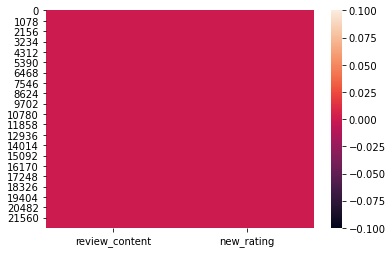

In [37]:
#checking for null values
sns.heatmap(Df.isnull())

So there are no null values.

<AxesSubplot:xlabel='new_rating', ylabel='count'>

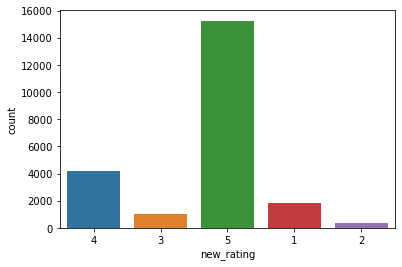

In [38]:
sns.countplot(Df['new_rating'])

We can see that the maximum ratings given by customers are 5 followed by 4, 1,3 and 2 respectively.

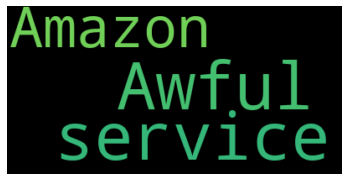

In [39]:
#extracting good words from the first row of the review_content feature
from wordcloud import WordCloud
text = Df.review_content[0]
wordcloud= WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
#merging all the review_content text with the previous text.
text=" ".join(review for review in Df.review_content)
print("There are {} words in the combination of all review.".format(len(text)))

There are 1783744 words in the combination of all review.


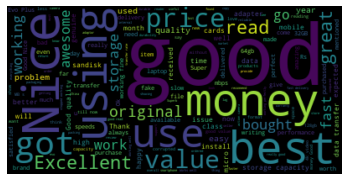

In [41]:
#getting the sense of good words used by reviewers
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(['service','product','amazon','write','samsung','memory','card','sd','phone','one','GB','device','speed','buy'])
wordcloud=WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:ylabel='None'>

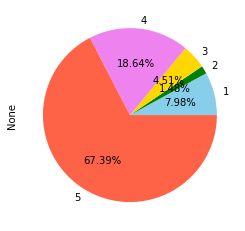

In [42]:
#printing pie chart to get the percentage of rating used
Df.groupby('new_rating').size().plot(kind='pie', autopct='%.2f%%',colors=['skyblue','green','gold','violet','tomato'])

We can see that 67.39% of customers given the rating of 5, 18.64% rated 4, 7.98% customers rated 1, 4.51% of customers rated 3 and remaining 1.48% of customers given 2 rating number.

In [43]:
#removing stopwords and punctuations in the text data.
def text_process(review_content):
    nopunc = [i for i in review_content if i not in string.punctuation]
    nopunc=nopunc.lower()
    nopunc_text=' '.join(nopunc)
    return [i for i in nopunc_text.split() if i not in stopwords.words('english')]

In [44]:
Df.skew()

new_rating   -1.981361
dtype: float64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features=10000, stop_words='english')
features=tf_vec.fit_transform(Df['review_content'])
x=features

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
y=Df['new_rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [47]:
y_train.shape,y_test.shape

((18097,), (4525,))

# Linear Regression:

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [49]:
training_data_prediction=lr.predict(x_train)

In [50]:
from sklearn.metrics import r2_score
error=r2_score(y_train,training_data_prediction)
print("R squared error :",error)

R squared error : 0.8568213077968965


In [51]:
testing_data_prediction=lr.predict(x_test)

In [52]:
error=r2_score(y_test,testing_data_prediction)
print("R squared error :",error)

R squared error : 0.84333593010761


In [53]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_pred_lr))
print('Mean squared error:', mean_squared_error(y_test,y_pred_lr))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred_lr)))

error:
Mean absolute error: 0.25089368303800796
Mean squared error: 0.21918413287002542
Root mean squared error: 0.4681710508671221


In [54]:
y_pred=lr.predict(x_test)
y_pred

array([4.99625438, 4.9999996 , 4.0000027 , ..., 5.06100839, 4.61408996,
       4.9999947 ])

# Decision Tree Regressor:

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [56]:
training_data_prediction=dt.predict(x_train)

In [57]:
error=r2_score(y_train,training_data_prediction)
print("R squared error :",error)

R squared error : 0.9209487552292118


In [58]:
testing_data_prediction=dt.predict(x_test)

In [59]:
error=r2_score(y_test,testing_data_prediction)
print("R squared error :",error)

R squared error : 0.9153383806646845


In [60]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_pred_dt))
print('Mean squared error:', mean_squared_error(y_test,y_pred_dt))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred_dt)))

error:
Mean absolute error: 0.1360142559606377
Mean squared error: 0.11844760342387023
Root mean squared error: 0.3441621760505797


In [61]:
y_pred = dt.predict(x_test)
y_pred

array([5.        , 5.        , 4.        , ..., 5.        , 4.60262829,
       5.        ])

# Gradient Boosting Regressor:

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [65]:
training_data_prediction=gbr.predict(x_train)

In [66]:
error=r2_score(y_train,training_data_prediction)
print("R squared error :",error)

R squared error : 0.49458450362441175


In [67]:
testing_data_prediction=gbr.predict(x_test)

In [68]:
error=r2_score(y_test,testing_data_prediction)
print("R squared error :",error)

R squared error : 0.4613694368867851


In [69]:
y_pred_gbr=gbr.predict(x_test)
y_pred_gbr

array([4.61732407, 4.67443074, 3.87863626, ..., 4.68491588, 4.61732407,
       4.32235141])

In [70]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_pred_gbr))
print('Mean squared error:', mean_squared_error(y_test,y_pred_gbr))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

error:
Mean absolute error: 0.6566947004022551
Mean squared error: 0.7535823178496286
Root mean squared error: 0.8680911921276638


# XG Boost Regressor:

In [71]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
training_data_prediction=xg.predict(x_train)

In [73]:
error=r2_score(y_train,training_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.7944545276014449


In [74]:
testing_data_prediction=xg.predict(x_test)

In [75]:
error=r2_score(y_test,testing_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.7692717367381614


In [76]:
y_pred_xg=xg.predict(x_test)
y_pred_xg

array([4.8187275, 4.7143183, 3.9844687, ..., 4.9174495, 4.6489196,
       4.81612  ], dtype=float32)

In [77]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_pred_xg))
print('Mean squared error:', mean_squared_error(y_test,y_pred_xg))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred_xg)))

error:
Mean absolute error: 0.4372538394098124
Mean squared error: 0.32280518657781637
Root mean squared error: 0.5681594728399909


Cross Validation Score:

In [83]:
print("Cross validation score of Linear Regression:",cross_val_score(lr,x,y,cv=5).mean()*100)

Cross validation score of Linear Regression: 85.33169326947822


In [84]:
print("Cross validation score of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=5).mean()*100)

Cross validation score of Decision Tree Regressor: 91.88433899886886


In [85]:
print("Cross validation score of Gradient Boosting Regressor:",cross_val_score(gbr,x,y,cv=5).mean()*100)

Cross validation score of Gradient Boosting Regressor: 49.530101714424504


In [86]:
print("Cross validation score of Xg Boosting Regressor:",cross_val_score(xg,x,y,cv=5).mean()*100)

Cross validation score of Xg Boosting Regressor: 79.39495864420464


So we can see that the cross validation score and the r2_score are almost similar so we can use this model for the tuning.

# Hyper Parameter Tuning:

In [110]:
from sklearn.model_selection import GridSearchCV
parameters = { #"criterion":["absolute_error","poisson"], 
              "splitter":["best",'random'], 
              "max_depth":[500], 
              "min_samples_split":[2,7], 
              "min_samples_leaf":[1,8],
              "max_features":["auto","sqrt","log2"]
              }
grid = GridSearchCV(estimator=dt, param_grid = parameters, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [500],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 8],
                         'min_samples_split': [2, 7],
                         'splitter': ['best', 'random']})

In [111]:
best_parameters=grid.best_params_
print(best_parameters)

{'max_depth': 500, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [119]:
(grid.best_score_)*100

92.69611656503385

In [115]:
clf=DecisionTreeRegressor( max_depth = 500, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, splitter = 'best')
clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=500, max_features='auto')

In [116]:
clf.score(x_test,y_test)*100

91.53383806646845

We can see that after tuning we are getting the improved result. So we will proceed for further evaluation.

# Further Evaluation:

In [120]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((r2_score(y_test,pred)*100))

91.53383806646845


# Model Saving:

In [121]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [122]:
preds = dt.predict(x_test)
dataframe=pd.DataFrame({})
dataframe['Actual rating']=y_test.values
dataframe['Predicted rating']=preds
print(dataframe)

     Actual rating  Predicted rating
0                5          5.000000
1                5          5.000000
2                4          4.000000
3                4          4.000000
4                3          3.937500
...            ...               ...
4520             5          5.000000
4521             5          5.000000
4522             5          5.000000
4523             4          4.602628
4524             5          5.000000

[4525 rows x 2 columns]


In [123]:
dataframe.sample(20)

,Actual rating,Predicted rating
2687,5,4.665842
1775,4,4.000000
2962,3,4.696809
4323,4,4.602628
3480,4,4.000000
955,5,4.602628
1347,2,2.000000
3705,5,5.000000
2524,4,4.000000
848,5,5.000000


Finally we obtained a good model with the accuracy of training and testing data of 92% and 91% respectively by using the Decision Tree Regressor model. So it is the best fit for the present dataset. And we have predicted the rating of the testing data with the help of regression models.